<a href="https://colab.research.google.com/github/Sumaiya379/AI-and-ML/blob/main/Lab_Class_K_Man.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

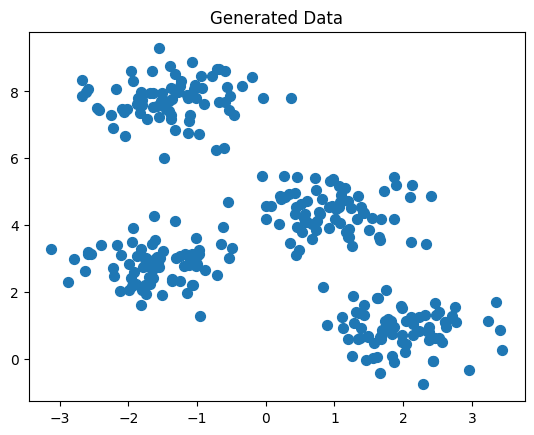

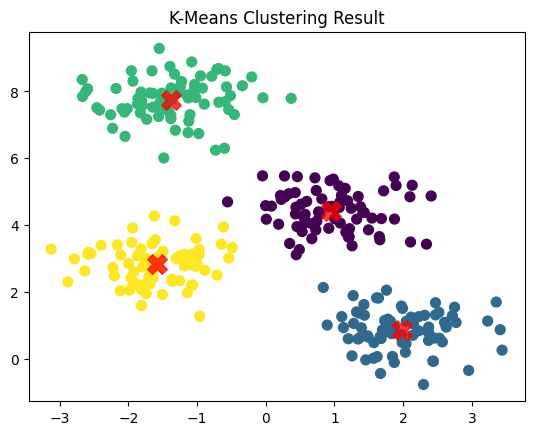

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Step 1: Generate synthetic dataset
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Step 2: Visualize the raw data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Data")
plt.show()

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Step 4: Plot the clustered data
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_  # Get the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-Means Clustering Result")
plt.show()


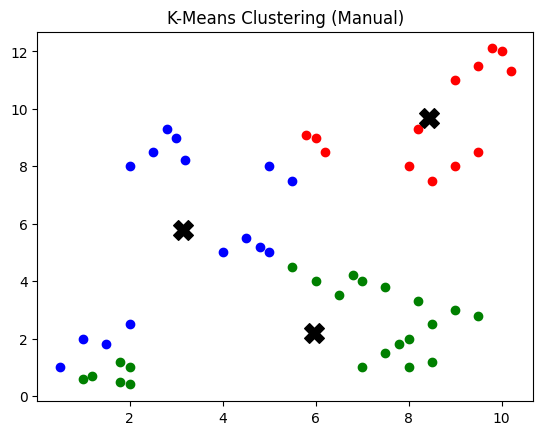

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create the data manually
X = np.array([
    [1, 2], [2, 1], [1.5, 1.8], [2, 2.5], [1.8, 1.2],
    [5, 8], [6, 9], [5.5, 7.5], [6.2, 8.5], [5.8, 9.1],
    [8, 8], [9, 8], [8.5, 7.5], [9.5, 8.5], [8.2, 9.3],
    [1, 0.6], [2, 0.4], [0.5, 1], [1.2, 0.7], [1.8, 0.5],
    [9, 11], [10, 12], [9.5, 11.5], [10.2, 11.3], [9.8, 12.1],
    [8, 2], [9, 3], [8.5, 2.5], [9.5, 2.8], [8.2, 3.3],
    [2, 8], [3, 9], [2.5, 8.5], [3.2, 8.2], [2.8, 9.3],
    [7, 1], [8, 1], [7.5, 1.5], [8.5, 1.2], [7.8, 1.8],
    [4, 5], [5, 5], [4.5, 5.5], [5.5, 4.5], [4.8, 5.2],
    [6, 4], [7, 4], [6.5, 3.5], [7.5, 3.8], [6.8, 4.2]
]
)

# Step 2: K-Means Parameters
k = 3  # Number of clusters
max_iterations = 100

# Step 3: Initialize centroids randomly (choose k random points from data)
np.random.seed(42)
random_indices = np.random.choice(len(X), size=k, replace=False)
centroids = X[random_indices]

# Step 4: K-Means Algorithm
for _ in range(max_iterations):
    # Assign points to the nearest centroid
    clusters = [[] for _ in range(k)]
    for point in X:
        distances = [np.linalg.norm(point - centroid) for centroid in centroids]
        cluster_idx = np.argmin(distances)
        clusters[cluster_idx].append(point)

    # Save old centroids for convergence checking
    old_centroids = centroids.copy()

    # Recompute centroids
    for i in range(k):
        if clusters[i]:  # avoid division by zero
            centroids[i] = np.mean(clusters[i], axis=0)

    # Check for convergence (no change in centroids)
    if np.all(centroids == old_centroids):
        break

# Step 5: Plot the clusters
colors = ['r', 'g', 'b']
for idx, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    if cluster.size != 0:
        plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[idx])

# Plot centroids
centroids = np.array(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='black')
plt.title("K-Means Clustering (Manual)")
plt.show()


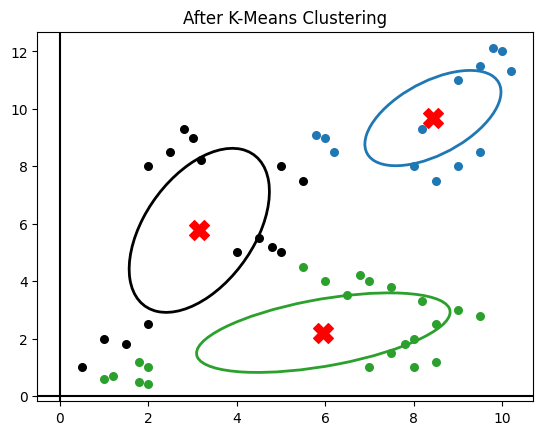

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Step 1: Create bigger dataset
X = np.array([
    [1, 2], [2, 1], [1.5, 1.8], [2, 2.5], [1.8, 1.2],
    [5, 8], [6, 9], [5.5, 7.5], [6.2, 8.5], [5.8, 9.1],
    [8, 8], [9, 8], [8.5, 7.5], [9.5, 8.5], [8.2, 9.3],
    [1, 0.6], [2, 0.4], [0.5, 1], [1.2, 0.7], [1.8, 0.5],
    [9, 11], [10, 12], [9.5, 11.5], [10.2, 11.3], [9.8, 12.1],
    [8, 2], [9, 3], [8.5, 2.5], [9.5, 2.8], [8.2, 3.3],
    [2, 8], [3, 9], [2.5, 8.5], [3.2, 8.2], [2.8, 9.3],
    [7, 1], [8, 1], [7.5, 1.5], [8.5, 1.2], [7.8, 1.8],
    [4, 5], [5, 5], [4.5, 5.5], [5.5, 4.5], [4.8, 5.2],
    [6, 4], [7, 4], [6.5, 3.5], [7.5, 3.8], [6.8, 4.2]
])

# Step 2: K-Means parameters
k = 3
max_iterations = 200

# Step 3: Initialize centroids
np.random.seed(42)
random_indices = np.random.choice(len(X), size=k, replace=False)
centroids = X[random_indices]

# Step 4: K-Means algorithm
for _ in range(max_iterations):
    clusters = [[] for _ in range(k)]
    for point in X:
        distances = [np.linalg.norm(point - centroid) for centroid in centroids]
        cluster_idx = np.argmin(distances)
        clusters[cluster_idx].append(point)

    old_centroids = centroids.copy()

    for i in range(k):
        if clusters[i]:
            centroids[i] = np.mean(clusters[i], axis=0)

    if np.allclose(centroids, old_centroids):
        break

# Step 5: Plot clusters nicely like the image
colors = ['#1f77b4', '#2ca02c', '#000000']  # blue, green, black
fig, ax = plt.subplots()

for idx, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    if cluster.size != 0:
        ax.scatter(cluster[:, 0], cluster[:, 1], color=colors[idx], s=30)

        # Draw ellipse around cluster
        cov = np.cov(cluster, rowvar=False)
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        vals = vals[order]
        vecs = vecs[:, order]
        angle = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
        width, height = 2 * np.sqrt(vals)
        ellipse = Ellipse(xy=centroids[idx], width=width, height=height, angle=angle,
                          edgecolor=colors[idx], facecolor='none', lw=2)
        ax.add_patch(ellipse)

# Plot centroids
centroids = np.array(centroids)
ax.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red')

# Decorations
ax.set_title("After K-Means Clustering")
ax.axhline(0, color='black')
ax.axvline(0, color='black')
plt.show()


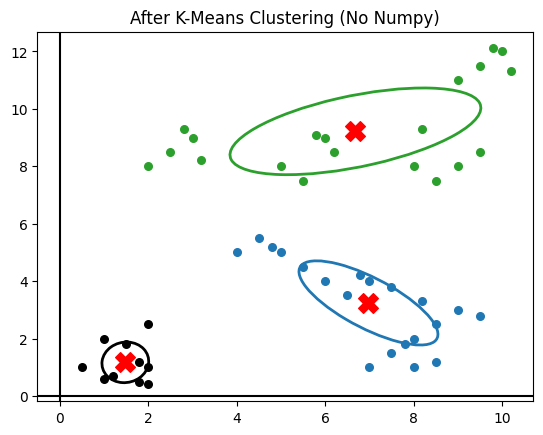

In [ ]:
import random
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Step 1: Create the data manually
X = [
    [1, 2], [2, 1], [1.5, 1.8], [2, 2.5], [1.8, 1.2],
    [5, 8], [6, 9], [5.5, 7.5], [6.2, 8.5], [5.8, 9.1],
    [8, 8], [9, 8], [8.5, 7.5], [9.5, 8.5], [8.2, 9.3],
    [1, 0.6], [2, 0.4], [0.5, 1], [1.2, 0.7], [1.8, 0.5],
    [9, 11], [10, 12], [9.5, 11.5], [10.2, 11.3], [9.8, 12.1],
    [8, 2], [9, 3], [8.5, 2.5], [9.5, 2.8], [8.2, 3.3],
    [2, 8], [3, 9], [2.5, 8.5], [3.2, 8.2], [2.8, 9.3],
    [7, 1], [8, 1], [7.5, 1.5], [8.5, 1.2], [7.8, 1.8],
    [4, 5], [5, 5], [4.5, 5.5], [5.5, 4.5], [4.8, 5.2],
    [6, 4], [7, 4], [6.5, 3.5], [7.5, 3.8], [6.8, 4.2]
]

# Step 2: K-Means parameters
k = 3
max_iterations = 200

# Step 3: Initialize centroids randomly
random.seed(42)
centroids = random.sample(X, k)

# Euclidean distance function
def euclidean(p1, p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

# Mean of list of points
def mean(points):
    n = len(points)
    if n == 0:
        return [0, 0]
    x_sum = sum(p[0] for p in points)
    y_sum = sum(p[1] for p in points)
    return [x_sum/n, y_sum/n]

# Step 4: K-Means algorithm
for _ in range(max_iterations):
    clusters = [[] for _ in range(k)]

    # Assign each point
    for point in X:
        distances = [euclidean(point, centroid) for centroid in centroids]
        cluster_idx = distances.index(min(distances))
        clusters[cluster_idx].append(point)

    old_centroids = centroids.copy()

    # Recalculate centroids
    centroids = [mean(cluster) for cluster in clusters]

    if old_centroids == centroids:
        break

# Step 5: Covariance and Ellipse Drawing without numpy

# Helper function to calculate simple covariance matrix
def calculate_covariance(points):
    n = len(points)
    if n <= 1:
        return [[1, 0], [0, 1]]  # avoid divide by zero

    mean_x = sum(p[0] for p in points) / n
    mean_y = sum(p[1] for p in points) / n

    var_x = sum((p[0] - mean_x)**2 for p in points) / (n-1)
    var_y = sum((p[1] - mean_y)**2 for p in points) / (n-1)
    cov_xy = sum((p[0] - mean_x)*(p[1] - mean_y) for p in points) / (n-1)

    return [[var_x, cov_xy], [cov_xy, var_y]]

# Step 6: Plot clusters
colors = ['#1f77b4', '#2ca02c', '#000000']  # blue, green, black
fig, ax = plt.subplots()

for idx, cluster in enumerate(clusters):
    if len(cluster) == 0:
        continue
    x_vals = [p[0] for p in cluster]
    y_vals = [p[1] for p in cluster]
    ax.scatter(x_vals, y_vals, color=colors[idx], s=30)

    # Calculate covariance and ellipse
    cov = calculate_covariance(cluster)
    eigenvalues = [
        (cov[0][0] + cov[1][1]) / 2 + math.sqrt(((cov[0][0] - cov[1][1]) / 2)**2 + cov[0][1]**2),
        (cov[0][0] + cov[1][1]) / 2 - math.sqrt(((cov[0][0] - cov[1][1]) / 2)**2 + cov[0][1]**2)
    ]
    angle = 0.5 * math.atan2(2 * cov[0][1], cov[0][0] - cov[1][1])
    angle = math.degrees(angle)

    width = 2 * math.sqrt(abs(eigenvalues[0]))
    height = 2 * math.sqrt(abs(eigenvalues[1]))

    ellipse = Ellipse(xy=centroids[idx], width=width, height=height, angle=angle,
                      edgecolor=colors[idx], facecolor='none', lw=2)
    ax.add_patch(ellipse)

# Plot centroids
for centroid in centroids:
    ax.scatter(centroid[0], centroid[1], marker='X', s=200, c='red')

# Decorations
ax.set_title("After K-Means Clustering (No Numpy)")
ax.axhline(0, color='black')
ax.axvline(0, color='black')
plt.show()


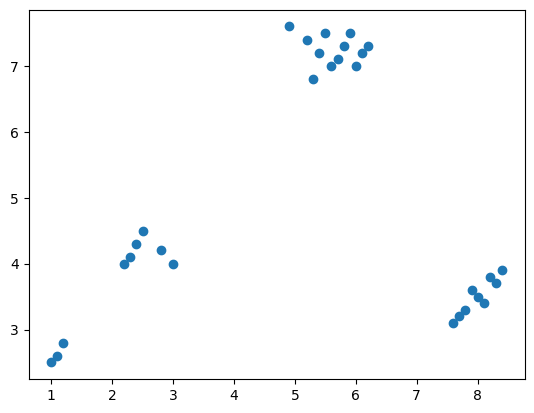

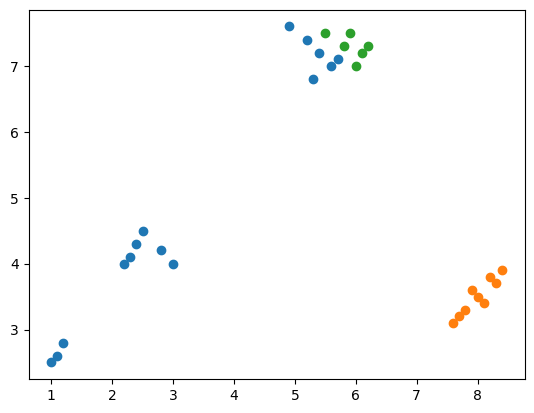

In [ ]:
import random
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Step 1: Create the data manually
data =[
    [2.5, 4.5],
    [3.0, 4.0],
    [2.8, 4.2],
    [5.5, 7.5],
    [5.6, 7.0],
    [5.8, 7.3],
    [8.0, 3.5],
    [8.2, 3.8],
    [7.9, 3.6],
    [1.0, 2.5],
    [1.2, 2.8],
    [1.1, 2.6],
    [5.3, 6.8],
    [5.7, 7.1],
    [5.4, 7.2],
    [8.1, 3.4],
    [8.3, 3.7],
    [8.4, 3.9],
    [2.2, 4.0],
    [2.4, 4.3],
    [2.3, 4.1],
    [4.9, 7.6],
    [5.2, 7.4],
    [5.9, 7.5],
    [7.8, 3.3],
    [7.7, 3.2],
    [7.6, 3.1],
    [6.0, 7.0],
    [6.1, 7.2],
    [6.2, 7.3]
]

def visual(data):
  x=[]
  y=[]
  for data_point in data:
    x.append(data_point[0])
    y.append(data_point[1])

  plt.scatter(x, y)
  plt.show()

visual(data)

k=3
random.shuffle(data)
random.shuffle(data)

cluster = {}
CR = {}

for i in range(k):
    picked_data = data.pop()
    cluster[i] = [picked_data]
    CR[i] = picked_data

def dist(p1, p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

def update_CR(cluster_id):
  for pros_CR in cluster[cluster_id]:
    distance = 0
    min_dist = 9999
    selected_CR = None
    for other_point in cluster[cluster_id]:
      distance += dist(pros_CR, other_point)
    if min_dist > distance:
      min_dist = distance
      selected_CR = pros_CR
  CR[cluster_id] = selected_CR

for data_point in data:
  min_dist = 9999
  pros_cluster = None
  for cluster_id in cluster.keys():
    distance = dist(data_point, CR[cluster_id])
    if min_dist > distance:
      min_dist = distance
      pros_cluster = cluster_id
  cluster[pros_cluster].append(data_point)


for cluster_id in cluster.keys():
    clustered_data = cluster[cluster_id]
    x = []
    y = []

    for data_point in clustered_data:
        x.append(data_point[0])
        y.append(data_point[1])

    plt.scatter(x, y)

plt.show()


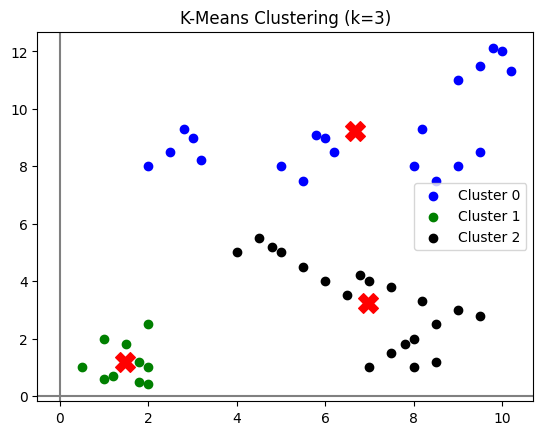

Cluster 0 (20 points): [[2, 8], [5.5, 7.5], [10.2, 11.3], [9, 8], [8.5, 7.5], [2.5, 8.5], [8, 8], [5.8, 9.1], [9, 11], [9.5, 8.5], [5, 8], [9.8, 12.1], [3, 9], [9.5, 11.5], [10, 12], [8.2, 9.3], [3.2, 8.2], [6, 9], [6.2, 8.5], [2.8, 9.3]]
Cluster 1 (10 points): [[1.5, 1.8], [2, 0.4], [2, 1], [1.2, 0.7], [1.8, 0.5], [1, 2], [1.8, 1.2], [2, 2.5], [1, 0.6], [0.5, 1]]
Cluster 2 (20 points): [[6.5, 3.5], [7, 4], [9.5, 2.8], [8.5, 2.5], [8, 2], [5, 5], [8.2, 3.3], [6, 4], [6.8, 4.2], [4.5, 5.5], [9, 3], [5.5, 4.5], [8.5, 1.2], [8, 1], [4, 5], [7.5, 1.5], [7.8, 1.8], [7.5, 3.8], [4.8, 5.2], [7, 1]]


In [ ]:
import random
import math
import matplotlib.pyplot as plt

# Given data
data = [
    [1, 2], [2, 1], [1.5, 1.8], [2, 2.5], [1.8, 1.2],
    [5, 8], [6, 9], [5.5, 7.5], [6.2, 8.5], [5.8, 9.1],
    [8, 8], [9, 8], [8.5, 7.5], [9.5, 8.5], [8.2, 9.3],
    [1, 0.6], [2, 0.4], [0.5, 1], [1.2, 0.7], [1.8, 0.5],
    [9, 11], [10, 12], [9.5, 11.5], [10.2, 11.3], [9.8, 12.1],
    [8, 2], [9, 3], [8.5, 2.5], [9.5, 2.8], [8.2, 3.3],
    [2, 8], [3, 9], [2.5, 8.5], [3.2, 8.2], [2.8, 9.3],
    [7, 1], [8, 1], [7.5, 1.5], [8.5, 1.2], [7.8, 1.8],
    [4, 5], [5, 5], [4.5, 5.5], [5.5, 4.5], [4.8, 5.2],
    [6, 4], [7, 4], [6.5, 3.5], [7.5, 3.8], [6.8, 4.2]
]

k = 3

# 1. Randomly choose initial centers
random.shuffle(data)
centers = data[:k]

# 2. Distance function
def distance(p1, p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

# 3. K-means algorithm
def kmeans(data, centers, iterations=5):
    for it in range(iterations):
        clusters = {i: [] for i in range(k)}
        for point in data:
            dists = [distance(point, center) for center in centers]
            min_index = dists.index(min(dists))
            clusters[min_index].append(point)

        # Update centers
        new_centers = []
        for idx in range(k):
            points = clusters[idx]
            if points:
                x_avg = sum(p[0] for p in points) / len(points)
                y_avg = sum(p[1] for p in points) / len(points)
                new_centers.append([x_avg, y_avg])
            else:
                new_centers.append(centers[idx])  # Keep old if no points
        centers = new_centers
    return clusters, centers

clusters, centers = kmeans(data, centers)

# 4. Plot
colors = ['blue', 'green', 'black']
fig, ax = plt.subplots()

for idx, (cluster_idx, points) in enumerate(clusters.items()):
    x_vals = [p[0] for p in points]
    y_vals = [p[1] for p in points]
    ax.scatter(x_vals, y_vals, color=colors[idx], label=f"Cluster {idx}")

for center in centers:
    ax.scatter(center[0], center[1], c='red', marker='X', s=200)

ax.set_title("K-Means Clustering (k=3)")
ax.axhline(0, color='gray')
ax.axvline(0, color='gray')
plt.legend()
plt.show()

# 5. Print clusters
for cluster_idx, points in clusters.items():
    print(f"Cluster {cluster_idx} ({len(points)} points): {points}")


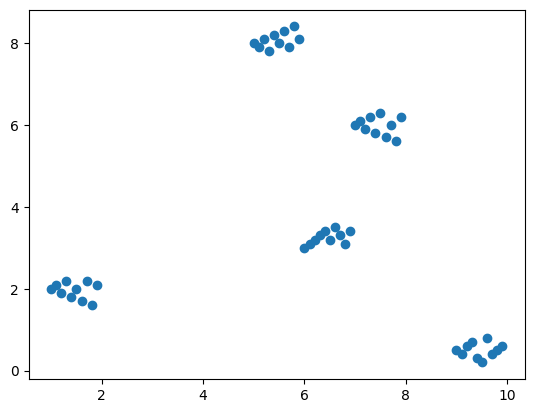

50
[(1.4, 1.8), (7.9, 6.2), (7.3, 6.2), (6.9, 3.4), (1.7, 2.2), (9.8, 0.5), (5.5, 8.0), (7.6, 5.7), (7.4, 5.8), (9.4, 0.3), (1.1, 2.1), (5.6, 8.3), (9.2, 0.6), (6.5, 3.2), (5.3, 7.8), (5.2, 8.1), (7.0, 6.0), (6.0, 3.0), (1.9, 2.1), (9.7, 0.4), (7.5, 6.3), (9.6, 0.8), (6.7, 3.3), (9.0, 0.5), (5.4, 8.2), (9.3, 0.7), (1.5, 2.0), (5.0, 8.0), (1.3, 2.2), (9.5, 0.2), (7.1, 6.1), (5.7, 7.9), (7.2, 5.9), (6.2, 3.2), (1.8, 1.6), (6.1, 3.1), (6.3, 3.3), (6.4, 3.4), (9.9, 0.6), (7.8, 5.6), (9.1, 0.4), (1.6, 1.7), (6.8, 3.1), (6.6, 3.5), (5.9, 8.1), (1.0, 2.0), (1.2, 1.9), (5.8, 8.4), (7.7, 6.0), (5.1, 7.9)]
{0: [(5.1, 7.9), (1.4, 1.8), (1.7, 2.2), (5.5, 8.0), (1.1, 2.1), (5.3, 7.8), (5.2, 8.1), (1.9, 2.1), (5.4, 8.2), (1.5, 2.0), (5.0, 8.0), (1.3, 2.2), (1.8, 1.6), (1.6, 1.7), (1.0, 2.0), (1.2, 1.9)], 1: [(7.7, 6.0), (7.9, 6.2), (7.3, 6.2), (6.9, 3.4), (9.8, 0.5), (7.6, 5.7), (7.4, 5.8), (9.4, 0.3), (9.2, 0.6), (6.5, 3.2), (7.0, 6.0), (6.0, 3.0), (9.7, 0.4), (7.5, 6.3), (9.6, 0.8), (6.7, 3.3), (9

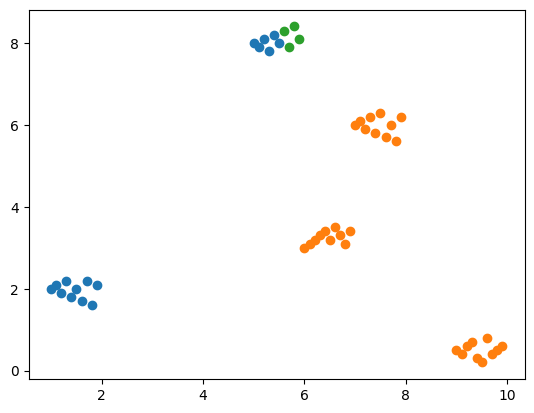

In [ ]:
import random
import math
import matplotlib.pyplot as plt

data = [
    (1.0, 2.0), (1.1, 2.1), (1.2, 1.9), (1.3, 2.2), (1.4, 1.8),
    (1.5, 2.0), (1.6, 1.7), (1.7, 2.2), (1.8, 1.6), (1.9, 2.1),
    (5.0, 8.0), (5.1, 7.9), (5.2, 8.1), (5.3, 7.8), (5.4, 8.2),
    (5.5, 8.0), (5.6, 8.3), (5.7, 7.9), (5.8, 8.4), (5.9, 8.1),
    (9.0, 0.5), (9.1, 0.4), (9.2, 0.6), (9.3, 0.7), (9.4, 0.3),
    (9.5, 0.2), (9.6, 0.8), (9.7, 0.4), (9.8, 0.5), (9.9, 0.6),
    (6.0, 3.0), (6.1, 3.1), (6.2, 3.2), (6.3, 3.3), (6.4, 3.4),
    (6.5, 3.2), (6.6, 3.5), (6.7, 3.3), (6.8, 3.1), (6.9, 3.4),
    (7.0, 6.0), (7.1, 6.1), (7.2, 5.9), (7.3, 6.2), (7.4, 5.8),
    (7.5, 6.3), (7.6, 5.7), (7.7, 6.0), (7.8, 5.6), (7.9, 6.2)
]

x = []
y = []

for data_point in data:
    x.append(data_point[0])
    y.append(data_point[1])

plt.scatter(x, y)

plt.show()

k = 3

random.shuffle(data)

print(len(data))
print(data)

cluster = {}
CR = {}

for i in range(k):
    picked_data = data.pop()
    cluster[i] = [picked_data]
    CR[i] = picked_data

def dist(d1, d2):
    return math.sqrt((d1[0]-d2[0])**2 + (d1[1]-d2[1])**2)

def update_CR(cluster_id):
    for pros_CR in cluster[cluster_id]:
        distance = 0
        min_dist = 9999
        sclected_CR = None
        for other_point in cluster[cluster_id]:
            distance += dist(pros_CR, other_point)
        if min_dist > distance:
            min_dist = distance
            sclected_CR = pros_CR

    CR[cluster_id] = sclected_CR


for data_point in data:
    min_dist = 9999
    pros_cluster = None
    for cluster_id in cluster.keys():
        distance = dist(data_point, CR[cluster_id])
        if min_dist > distance:
            min_dist = distance
            pros_cluster = cluster_id
    cluster[pros_cluster].append(data_point)

print(cluster)

print(len(data))

for cluster_id in cluster.keys():
    clustered_data = cluster[cluster_id]
    x = []
    y = []

    for data_point in clustered_data:
        x.append(data_point[0])
        y.append(data_point[1])

    plt.scatter(x, y)

plt.show()